In [1]:
import sys
sys.path.append('..')
from src.pomdp import *

## Model definition

In [2]:
model, solver = load_POMDP_file(file_name='./Example Models/tiger.95.POMDP')

[01/21/2024, 15:20:26] Instantiation of MDP Model:
[01/21/2024, 15:20:26] - 2 states
[01/21/2024, 15:20:26] - 3 actions
[01/21/2024, 15:20:26] - Starting generation of transitions table
[01/21/2024, 15:20:26]     > Done in 0.000s
[01/21/2024, 15:20:26] - Generation of state grid
[01/21/2024, 15:20:26] - Generating start probabilities table
[01/21/2024, 15:20:26] - Starting computation of reachable states from transition data
[01/21/2024, 15:20:26]     > Done in 0.000s
[01/21/2024, 15:20:26] - At most 2 reachable states per state-action pair
[01/21/2024, 15:20:26] - Starting computation of reachable state probabilities from transition data
[01/21/2024, 15:20:26]     > Done in 0.000s

[01/21/2024, 15:20:26] POMDP particular parameters:
[01/21/2024, 15:20:26] - 2 observations
[01/21/2024, 15:20:26] - Starting of transitional observations for reachable states table
[01/21/2024, 15:20:26]     > Done in 0.000s
[01/21/2024, 15:20:26] - Starting generation of expected rewards table
[01/21/2024

In [3]:
model.end_actions = [1,2]

## Solving

In [8]:
vf, history = solver.solve(model,expansions=8, update_passes=8, history_tracking_level=2)

Expansions:   0%|          | 0/8 [00:00<?, ?it/s]

Backups 0:   0%|          | 0/8 [00:00<?, ?it/s]

Backups 1:   0%|          | 0/8 [00:00<?, ?it/s]

Backups 2:   0%|          | 0/8 [00:00<?, ?it/s]

Backups 3:   0%|          | 0/8 [00:00<?, ?it/s]

Backups 4:   0%|          | 0/8 [00:00<?, ?it/s]

Backups 5:   0%|          | 0/8 [00:00<?, ?it/s]

Backups 6:   0%|          | 0/8 [00:00<?, ?it/s]

Backups 7:   0%|          | 0/8 [00:00<?, ?it/s]

<Figure size 700x500 with 0 Axes>

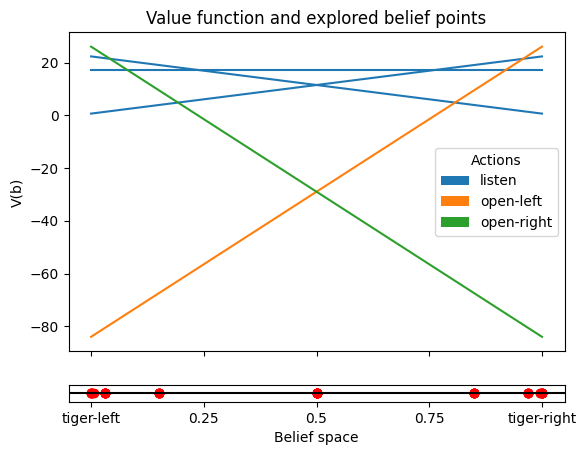

In [9]:
history.plot_solution()

In [11]:
b0 = Belief(model)

In [12]:
b1 = b0.update(0, 0)

In [13]:
b2 = b1.update(0, 0)

In [15]:
b1.values

array([0.85, 0.15])

In [16]:
b3 = b0.update(0,1)

In [17]:
b4 = b3.update(0,1)

In [18]:
bback = b3.update(0,0)

In [20]:
belief_set = [b0,b1,b2,b3,b4]

In [26]:
def find_xintersect(xs, ys):
    intersection_x = (((xs[0] * ys[0][1]) - (xs[1] * ys[0][0])) * -1) - (-1 * ((xs[0] * ys[1][1]) - (xs[1] * ys[1][0])))
    intersection_x /= (-1 * (ys[1][0] - ys[1][1])) - (-1 * (ys[0][0] - ys[0][1]))
    return intersection_x

In [29]:
vf.alpha_vector_list[:2]

In [33]:
intersects = []
for av in vf.alpha_vector_list[:3]:
    intersects.append(find_xintersect([0,1], [av.values.tolist(), vf.alpha_vector_list[3].values.tolist()]))

intersect_2 = max(intersects)

In [34]:
intersects = []
for av in vf.alpha_vector_list[:3]:
    intersects.append(find_xintersect([0,1], [av.values.tolist(), vf.alpha_vector_list[4].values.tolist()]))

intersect_1 = min(intersects)

In [35]:
print(f'{intersect_1}, {intersect_2}')

0.041972822899461214, 0.9580271771005388


In [53]:
COLOR_LIST[1]['name']

'orange'

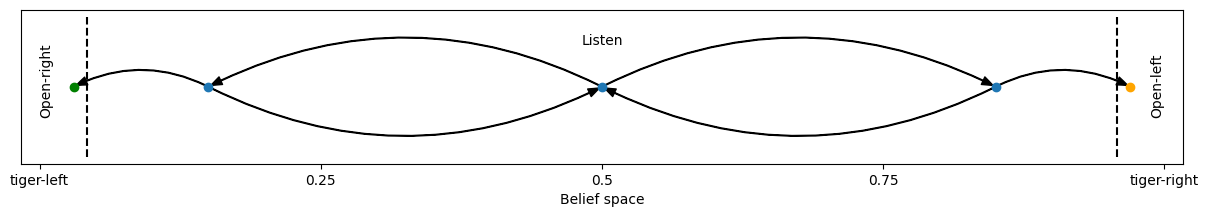

In [72]:
fig, ax = plt.subplots(1, figsize=(15,2))
ax.scatter([bp.values[0] for bp in [b0,b1,b3]], np.zeros(3), zorder=10)
ax.scatter([bp.values[0] for bp in [b2]], np.zeros(1), c=COLOR_LIST[1]['name'], zorder=10)
ax.scatter([bp.values[0] for bp in [b4]], np.zeros(1), c=COLOR_LIST[2]['name'], zorder=10)
ax.vlines([intersect_1, intersect_2], ymin=-0.05, ymax= 0.05, colors='black', linestyles='dashed')

ax.annotate('Listen', (0.5, 0.03), ha='center')
ax.annotate('Open-right', (0, -0.02), ha='left', rotation=90)
ax.annotate('Open-left', (1, -0.02), ha='right', rotation=90)

ax.set_xticks([0, 0.25, 0.5, 0.75, 1], ["tiger-left", "0.25", "0.5", "0.75", "tiger-right"])
ax.set_xlabel('Belief space')

ax.set_yticks([])

style = "Simple, tail_width=0.5, head_width=6, head_length=8"
kw = dict(arrowstyle=style, color="k")

ax.add_patch(patches.FancyArrowPatch((b0.values[0], 0), (b1.values[0], 0), connectionstyle=f"arc3,rad=-{0}.25", **kw))
ax.add_patch(patches.FancyArrowPatch((b1.values[0], 0), (b2.values[0], 0), connectionstyle=f"arc3,rad=-{0}.25", **kw))
ax.add_patch(patches.FancyArrowPatch((b1.values[0], 0), (b0.values[0], 0), connectionstyle=f"arc3,rad=-{0}.25", **kw))

ax.add_patch(patches.FancyArrowPatch((b0.values[0], 0), (b3.values[0], 0), connectionstyle=f"arc3,rad={0}.25", **kw))
ax.add_patch(patches.FancyArrowPatch((b3.values[0], 0), (b4.values[0], 0), connectionstyle=f"arc3,rad={0}.25", **kw))
ax.add_patch(patches.FancyArrowPatch((b3.values[0], 0), (b0.values[0], 0), connectionstyle=f"arc3,rad={0}.25", **kw))

In [10]:
len(vf)

5

In [6]:
a = Agent(model)
a.value_function = vf

In [10]:
sim_history = a.simulate()

  0%|          | 2/1000 [00:00<?, ?it/s]


In [8]:
# rh.save_simulation_video()

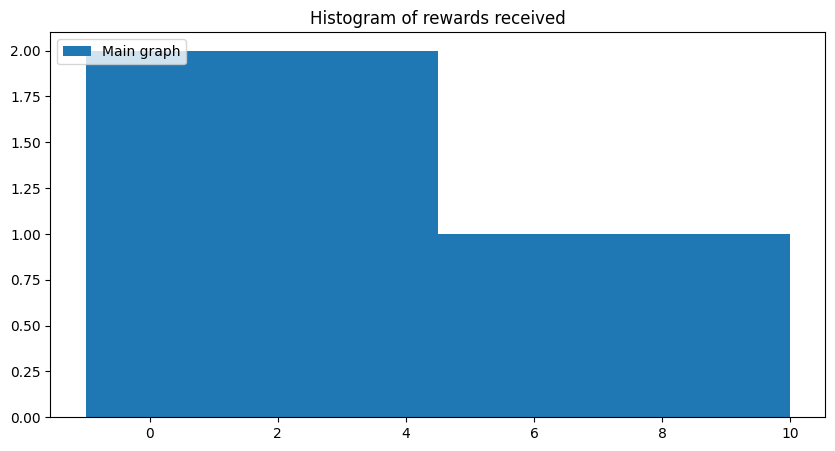

In [11]:
sim_history.rewards.plot('histogram')

In [12]:
rewards = a.run_n_simulations()

100%|██████████| 1000/1000 [00:00<00:00, 5237.88it/s]


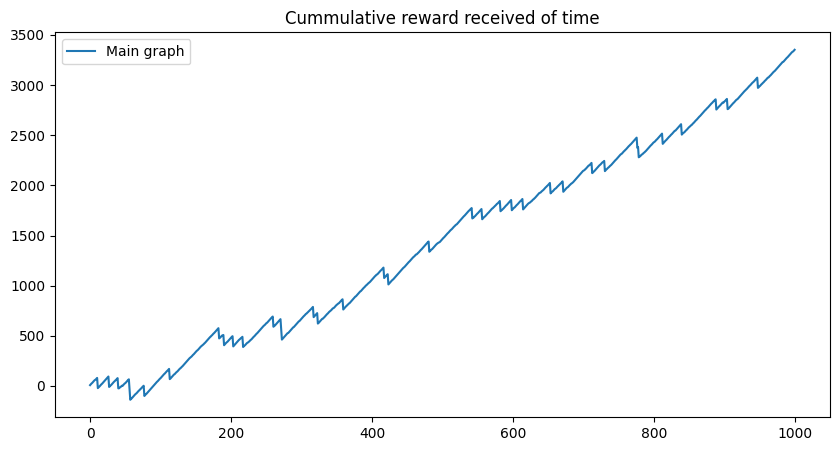

In [13]:
rewards.plot('total')